In [1]:
from sklearn.datasets import load_boston
housing = load_boston()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25)

In [5]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pl1 = Pipeline([['pca', PCA(random_state=2018)],
                ['svr', SVR(kernel='linear')]])

In [6]:
prms1 = {'pca__n_components': [0.1, 0.5, 0.9],
         'svr__C': [0.1, 0.5, 1.],
         'svr__epsilon': [0.05, 0.10, 0.20]}

In [7]:
from sklearn.model_selection import GridSearchCV
gs1 = GridSearchCV(pl1, prms1, n_jobs=-1, return_train_score=True, cv=5, verbose=10)
gs1.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    8.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['pca', PCA(random_state=2018)],
                                       ['svr', SVR(kernel='linear')]]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.1, 0.5, 0.9],
                         'svr__C': [0.1, 0.5, 1.0],
                         'svr__epsilon': [0.05, 0.1, 0.2]},
             return_train_score=True, verbose=10)

In [8]:
prms2 = {'C': [0.1, 0.5, 1.],
        'epsilon': [0.05, 0.10, 0.20]}
gs2 = GridSearchCV(SVR(kernel='linear'), prms2, n_jobs=-1, return_train_score=True, cv=5, verbose=10)
gs2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1304s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0789s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    4.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    6.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    7.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.5s finished


GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0], 'epsilon': [0.05, 0.1, 0.2]},
             return_train_score=True, verbose=10)

In [9]:
from mypca import myPCA

In [10]:
prms3 = prms1
pl3 = Pipeline([['pca', myPCA(random_state=2018)],
                ['svr', SVR(kernel='linear')]])
gs3 = GridSearchCV(pl3, prms3, n_jobs=-1, return_train_score=True, cv=5, verbose=10)
gs3.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0373s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['pca', myPCA(random_state=2018)],
                                       ['svr', SVR(kernel='linear')]]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.1, 0.5, 0.9],
                         'svr__C': [0.1, 0.5, 1.0],
                         'svr__epsilon': [0.05, 0.1, 0.2]},
             return_train_score=True, verbose=10)

In [11]:
prms4 = {'pca__n_components': [0, 0.1, 0.5, 0.9],
         'svr__C': [0.1, 0.5, 1.],
         'svr__epsilon': [0.05, 0.10, 0.20]}
pl4 = pl3
gs4 = GridSearchCV(pl4, prms4, n_jobs=-1, return_train_score=True, cv=5, verbose=10)
gs4.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1493s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0878s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   13.3s
[Parallel(n_jo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['pca', myPCA(random_state=2018)],
                                       ['svr', SVR(kernel='linear')]]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0, 0.1, 0.5, 0.9],
                         'svr__C': [0.1, 0.5, 1.0],
                         'svr__epsilon': [0.05, 0.1, 0.2]},
             return_train_score=True, verbose=10)

people.images.shape: (3023, 87, 65)
클래스 개수: 62


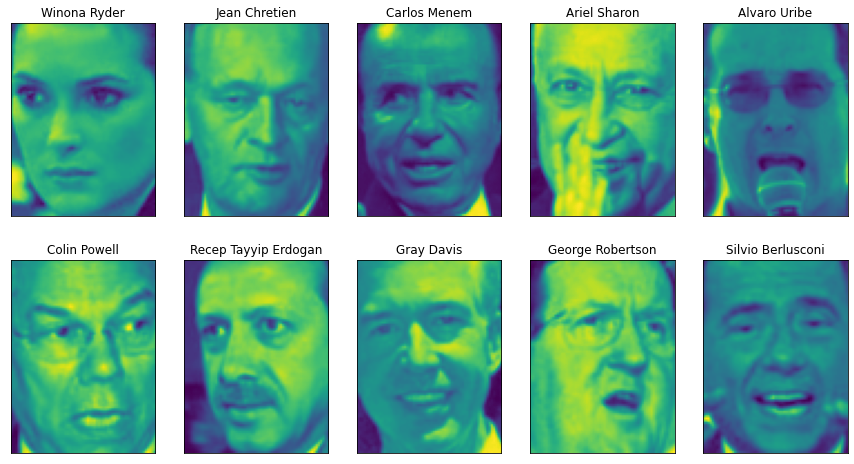

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig,axes = plt.subplots(2,5,figsize=(15,8) , subplot_kw={'xticks':(),'yticks':()})
for target,images , ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(images)
    ax.set_title(people.target_names[target])

print('people.images.shape:', people.images.shape)
print('클래스 개수:', len(people.target_names))